# Versão 1.0

Nessa versão utilizei K-means para os 6 clusteres, dados normalizados somente por feature e NÃO utilizei o filtro Kalman

In [1]:
#Importando as bibliotecas

# Data Analysis Tools
import pandas as pd
import numpy as np
from time import time
import logging as log

# Visualization Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

# Machine Learning Tools
import sklearn
import sklearn.mixture as mix
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import preprocessing
import xgboost as xgb
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


#Scoreing tools
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_log_error

# plt.rcParams['figure.figsize'] = (10, 10)

def get_sensor_names(tag_names):
    """ Get tagnames starting with sensor.
    
    :param tag_names: Input time series data frame
    
    :return list of string tag names starting with sensor.
    """
    
    return [tag_name for tag_name in tag_names if tag_name.startswith('sensor')]

c:\programdata\anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\programdata\anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
#Tag Names que foram explicadas no arquivo Challenge Data description 2016
tag_names = ['unit','cycle_num', 'setting1','setting2',
         'setting3', 'sensor1', 'sensor2',
         'sensor3', 'sensor4', 'sensor5', 'sensor6',
         'sensor7', 'sensor8', 'sensor9', 'sensor10',
         'sensor11', 'sensor12', 'sensor13', 'sensor14',
         'sensor15', 'sensor16', 'sensor17', 'sensor18',
         'sensor19', 'sensor20', 'sensor21']

sensor_columns = get_sensor_names(tag_names)
train_data = pd.read_csv('train.txt', sep=' ', header=None, names=tag_names,index_col=False)
test_data = pd.read_csv('test.txt', sep=' ', header=None, names=tag_names,index_col=False)
final_test = pd.read_csv('final_test.txt', sep=' ', header=None, names=tag_names,index_col=False)

print "O dataset de treino tem {} linhas de dados e {} atributos.".format(*train_data.shape)
print "O dataset de teste tem {} linhas de dados e {} atributos.".format(*test_data.shape)
print "O dataset de testes finais tem {} linhas de dados e {} atributos.".format(*final_test.shape)


O dataset de treino tem 45918 linhas de dados e 26 atributos.
O dataset de teste tem 29820 linhas de dados e 26 atributos.
O dataset de testes finais tem 55156 linhas de dados e 26 atributos.


In [29]:
# Mostre a descrição do conjunto de dados

# display(train_data.head(15))

# display(train_data['sensor5'].describe())

# display(train_data['sensor5'])

In [31]:
final_test.head()

,unit,cycle_num,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,605.02,1498.72,1304.90,10.52,...,371.83,2388.12,8128.58,8.6402,0.03,371,2319,100.0,28.52,17.0653
1,1,2,0.0015,0.0003,100.0,518.67,642.69,1592.90,1405.35,14.62,...,521.88,2388.09,8128.07,8.4286,0.03,392,2388,100.0,38.95,23.3609
2,1,3,34.9986,0.8401,60.0,449.44,555.49,1357.71,1127.52,5.48,...,182.97,2387.92,8060.07,9.3065,0.02,333,2223,100.0,14.91,8.8185
3,1,4,20.0031,0.7005,0.0,491.19,607.62,1479.86,1257.25,9.35,...,315.29,2388.09,8060.00,9.2381,0.02,365,2324,100.0,24.35,14.7075
4,1,5,42.0041,0.8405,40.0,445.00,549.69,1354.17,1124.17,3.91,...,130.50,2387.84,8080.66,9.3950,0.02,331,2212,100.0,10.67,6.4837


Analisando os três *'settings'* para observar alguma correlação.

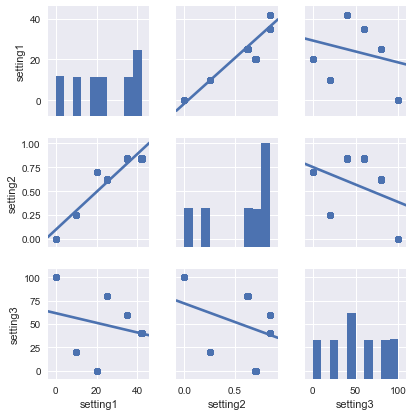

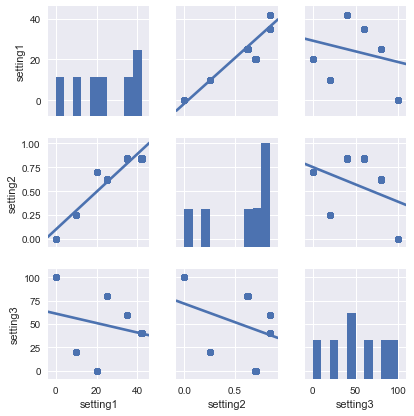

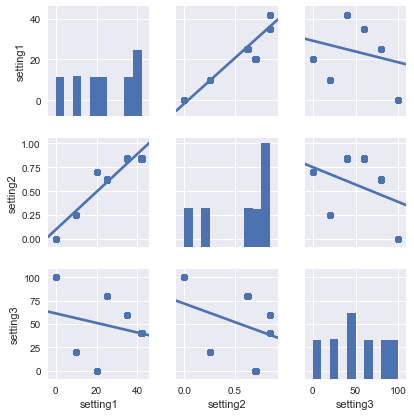

In [34]:
#Treino
settings_data_treino = train_data[['unit','setting1', 'setting2', 'setting3']]
target_treino = train_data[['cycle_num']]

sns.set(style="darkgrid", color_codes=True)
sns.pairplot(settings_data_treino.drop(['unit'], axis = 1),kind="reg", size=2)
plt.savefig('Correlation settings train data.png', format='png', dpi=100)

#Teste
settings_data_teste = test_data[['unit','setting1', 'setting2', 'setting3']]
target_teste = test_data[['cycle_num']]

sns.set(style="darkgrid", color_codes=True)
sns.pairplot(settings_data_teste.drop(['unit'], axis = 1),kind="reg", size=2)
plt.savefig('Correlation settings test data.png', format='png', dpi=100)

#Teste Final
settings_data_testefinal = final_test[['unit','setting1', 'setting2', 'setting3']]
target_testefinal = final_test[['cycle_num']]

sns.set(style="darkgrid", color_codes=True)
sns.pairplot(settings_data_testefinal.drop(['unit'], axis = 1),kind="reg", size=2)
plt.savefig('Correlation settings final test data.png', format='png', dpi=100)

Os *'setting1'* e *'setting2'* apresentam uma correlação, aparentemente linear.

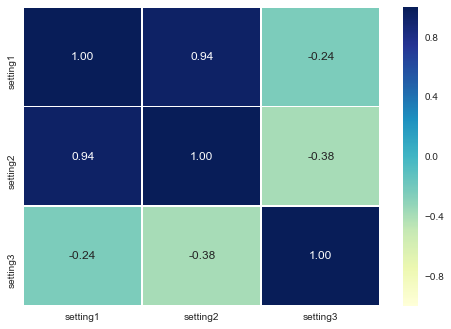

In [41]:
#Treino
fig = sns.heatmap(settings_data_treino.drop(['unit'], axis = 1).corr(),annot = True,fmt = ".2f",linewidths=.7,cmap="YlGnBu")
plt.savefig('Correlation map train dataset.png', format='png', dpi=100)

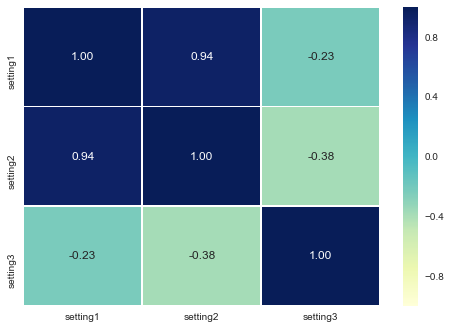

In [42]:
#Teste
fig = sns.heatmap(settings_data_teste.drop(['unit'], axis = 1).corr(),annot = True,fmt = ".2f",linewidths=.7,cmap="YlGnBu")
plt.savefig('Correlation map test dataset.png', format='png', dpi=100)

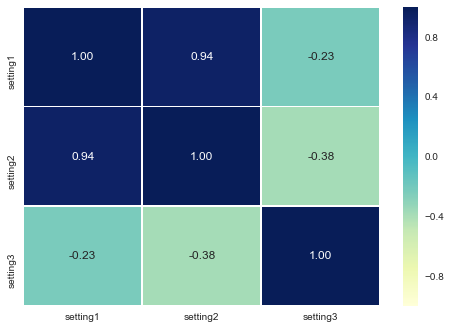

In [43]:
#Teste Final
fig = sns.heatmap(settings_data_testefinal.drop(['unit'], axis = 1).corr(),annot = True,fmt = ".2f",linewidths=.7,cmap="YlGnBu")
plt.savefig('Correlation map final test dataset.png', format='png', dpi=100)

In [49]:
# # plot feature importance manually RANDOM FOREST
# Build a forest and compute the feature importances

# load data
X = settings_data_treino.drop(['unit'], axis = 1).values
y = target_treino.values

forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0,
                              max_depth = 1000)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Feature ranking:
1. feature 0 (0.756049)
2. feature 1 (0.243594)
3. feature 2 (0.000357)


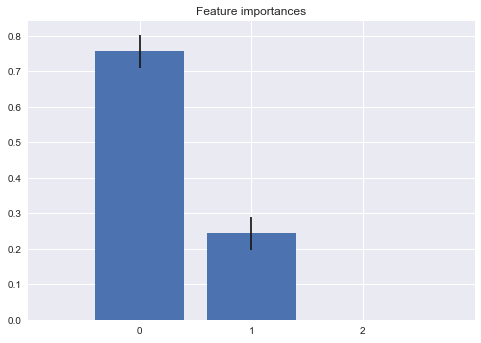

In [51]:
# plot# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


plt.savefig('Features importances.png', format='png', dpi=100)

Nas linhas abaixos, irei reduzir o número de parâmetros de operação ou *setting* para apenas dois através da média entre os *setting 1* e do *setting 2*

In [90]:
#Treino
new_setting_treino = pd.DataFrame({'mean_setting1_and_setting2':(settings_data_treino['setting1'] + settings_data_treino['setting2'])/2})
s_treino = settings_data_treino['setting3']
r_treino = settings_data_treino['unit']
settings_final_treino = pd.concat([new_setting_treino,s_treino], axis = 1)
print settings_final_treino.tail()
print ('\n')

#Teste
new_setting_teste = pd.DataFrame({'mean_setting1_and_setting2':(settings_data_teste['setting1'] + settings_data_teste['setting2'])/2})
s_teste = settings_data_teste['setting3']
r_teste = settings_data_teste['unit']
settings_final_teste = pd.concat([new_setting_teste,s_teste], axis = 1)
print settings_final_teste.tail()
print ('\n')

#Teste Final
new_setting_testefinal = pd.DataFrame({'mean_setting1_and_setting2':(settings_data_testefinal['setting1'] + settings_data_testefinal['setting2'])/2})
s_testefinal = settings_data_testefinal['setting3']
r_testefinal = settings_data_testefinal['unit']
settings_final_testefinal = pd.concat([new_setting_testefinal,s_testefinal], axis = 1)
print settings_final_testefinal.tail()


       mean_setting1_and_setting2  setting3
45913                    21.42330      40.0
45914                    21.42220      40.0
45915                    21.41995      40.0
45916                    17.92130      60.0
45917                    12.81435      80.0


       mean_setting1_and_setting2  setting3
29815                    17.92085      60.0
29816                    12.81205      80.0
29817                    10.35215       0.0
29818                    10.35185       0.0
29819                    10.34980       0.0


       mean_setting1_and_setting2  setting3
55151                    17.91965      60.0
55152                     0.00065     100.0
55153                    17.92430      60.0
55154                     5.12930      20.0
55155                    17.92395      60.0


('O resultado silh_score e = 0.623192037212', 'para um cluster_size de 2')
('O resultado silh_score e = 0.769197587522', 'para um cluster_size de 3')
('O resultado silh_score e = 0.856588662449', 'para um cluster_size de 4')
('O resultado silh_score e = 0.930887231078', 'para um cluster_size de 5')
('O resultado silh_score e = 0.999521629341', 'para um cluster_size de 6')
('O resultado silh_score e = 0.903944155812', 'para um cluster_size de 7')
('O resultado silh_score e = 0.852982473187', 'para um cluster_size de 8')
('O resultado silh_score e = 0.792692250478', 'para um cluster_size de 9')


O número ótimo de cluster é = 6




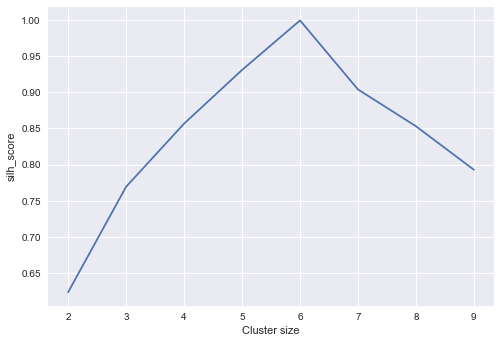

In [94]:
#Treino
scores= []
cluster_sizes = range(2,10)

#Set a seed value for the random number enerator to get repeatable results
np.random.seed(10)

for num_clusters in cluster_sizes:
    clusterer = KMeans(n_clusters=num_clusters, 
                    n_init=100, 
                    max_iter=5000,
                    random_state=10)
    
    cluster_labels = clusterer.fit_predict(new_setting_treino)
    
    size = num_clusters
    
    centers = clusterer.cluster_centers_
    
    silh_score = silhouette_score(new_setting_treino.values, cluster_labels, sample_size=2000)
    scores.append(silh_score)
    print ('O resultado silh_score e = {}'.format(silh_score),'para um cluster_size de {}'.format(size))
    
print ('\n')    
print 'O número ótimo de cluster é = {}'.format(cluster_sizes[np.argmax(scores)])
chosen_cluster_size = cluster_sizes[np.argmax(scores)]
print ('\n')  
plt.plot(cluster_sizes, scores)
plt.ylabel('silh_score')
plt.xlabel('Cluster size')
plt.savefig('Cluster size para os dados de treino.png', format='png', dpi=100)


predictions = KMeans(n_clusters=chosen_cluster_size).fit_predict(new_setting_treino)


values = predictions
index = ['y']
columns = ['overall setting']

overall_setting_train = pd.DataFrame(data=values, columns=columns, dtype='int')

('O resultado silh_score e = 0.626856509969', 'para um cluster_size de 2')
('O resultado silh_score e = 0.775053295345', 'para um cluster_size de 3')
('O resultado silh_score e = 0.851341101317', 'para um cluster_size de 4')
('O resultado silh_score e = 0.924104457147', 'para um cluster_size de 5')
('O resultado silh_score e = 0.999532410118', 'para um cluster_size de 6')
('O resultado silh_score e = 0.901923017791', 'para um cluster_size de 7')
('O resultado silh_score e = 0.852985679161', 'para um cluster_size de 8')
('O resultado silh_score e = 0.784005818117', 'para um cluster_size de 9')


O número ótimo de cluster é = 6




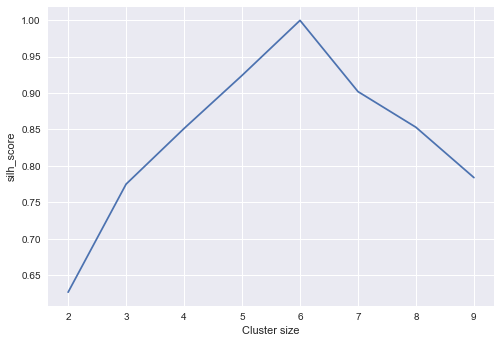

In [110]:
#Testes
scores= []
cluster_sizes = range(2,10)

#Set a seed value for the random number enerator to get repeatable results
np.random.seed(10)

for num_clusters in cluster_sizes:
    clusterer = KMeans(n_clusters=num_clusters, 
                    n_init=100, 
                    max_iter=5000,
                    random_state=10)
    
    cluster_labels = clusterer.fit_predict(new_setting_teste)
    
    size = num_clusters
    
    centers = clusterer.cluster_centers_
    
    silh_score = silhouette_score(new_setting_teste.values, cluster_labels, sample_size=2000)
    scores.append(silh_score)
    print ('O resultado silh_score e = {}'.format(silh_score),'para um cluster_size de {}'.format(size))
    
print ('\n')    
print 'O número ótimo de cluster é = {}'.format(cluster_sizes[np.argmax(scores)])
chosen_cluster_size = cluster_sizes[np.argmax(scores)]
print ('\n')  
plt.plot(cluster_sizes, scores)
plt.ylabel('silh_score')
plt.xlabel('Cluster size')
plt.savefig('Cluster size para os dados de teste.png', format='png', dpi=100)


predictions = KMeans(n_clusters=chosen_cluster_size).fit_predict(new_setting_teste)


values = predictions
index = ['y']
columns = ['overall setting']

overall_setting_test = pd.DataFrame(data=values, columns=columns, dtype='int')

('O resultado silh_score e = 0.629626039475', 'para um cluster_size de 2')
('O resultado silh_score e = 0.772169769914', 'para um cluster_size de 3')
('O resultado silh_score e = 0.854695776292', 'para um cluster_size de 4')
('O resultado silh_score e = 0.929526954056', 'para um cluster_size de 5')
('O resultado silh_score e = 0.999523749076', 'para um cluster_size de 6')
('O resultado silh_score e = 0.902013794488', 'para um cluster_size de 7')
('O resultado silh_score e = 0.841392906665', 'para um cluster_size de 8')
('O resultado silh_score e = 0.792073935219', 'para um cluster_size de 9')


O número ótimo de cluster é = 6




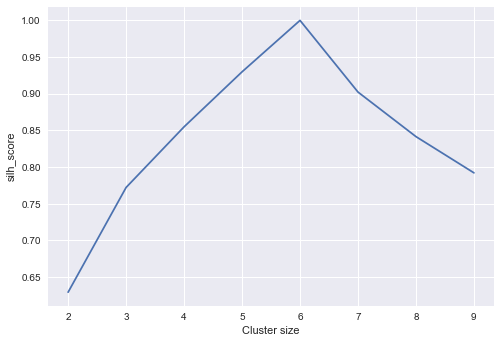

In [111]:
#Testes Finais
scores= []
cluster_sizes = range(2,10)

#Set a seed value for the random number enerator to get repeatable results
np.random.seed(10)

for num_clusters in cluster_sizes:
    clusterer = KMeans(n_clusters=num_clusters, 
                    n_init=100, 
                    max_iter=5000,
                    random_state=10)
    
    cluster_labels = clusterer.fit_predict(new_setting_testefinal)
    
    size = num_clusters
    
    centers = clusterer.cluster_centers_
    
    silh_score = silhouette_score(new_setting_testefinal.values, cluster_labels, sample_size=2000)
    scores.append(silh_score)
    print ('O resultado silh_score e = {}'.format(silh_score),'para um cluster_size de {}'.format(size))
    
print ('\n')    
print 'O número ótimo de cluster é = {}'.format(cluster_sizes[np.argmax(scores)])
chosen_cluster_size = cluster_sizes[np.argmax(scores)]
print ('\n')  
plt.plot(cluster_sizes, scores)
plt.ylabel('silh_score')
plt.xlabel('Cluster size')
plt.savefig('Cluster size para os dados de teste final.png', format='png', dpi=100)


predictions = KMeans(n_clusters=chosen_cluster_size).fit_predict(new_setting_testefinal)


values = predictions
index = ['y']
columns = ['overall setting']

overall_setting_finaltest = pd.DataFrame(data=values, columns=columns, dtype='int')

TypeError: scatter() takes at least 3 arguments (3 given)

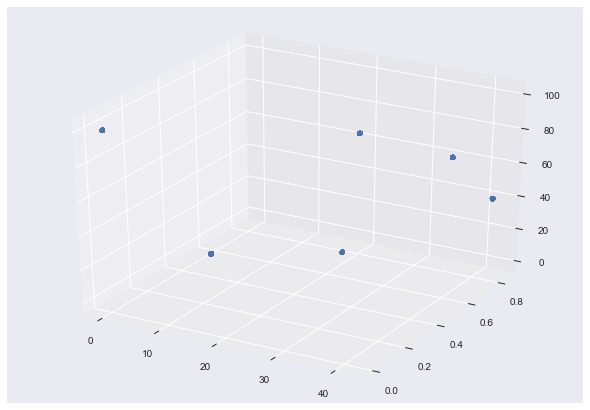

In [67]:
#Plot dos clusteres realizados

from mpl_toolkits.mplot3d import Axes3D

C = centers

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(settings_data_treino['setting1'],settings_data_treino['setting2'],settings_data_treino['setting3'])
ax.scatter(C, marker='*', c='r')
plt.xlabel('setting1', fontsize=20 )
plt.ylabel('setting2', fontsize=20)
plt.zlabel('setting3', fontsize=20)
plt.tick_params(labelsize=15)
plt.savefig('Settings distribution along space.png', format='png', dpi=100)


In [112]:
#Treino
sensor_names = get_sensor_names(tag_names)
sensor_data_train = train_data[sensor_names]

#Teste
sensor_names = get_sensor_names(tag_names)
sensor_data_test = test_data[sensor_names]

#Teste Final
sensor_names = get_sensor_names(tag_names)
sensor_data_finaltest = final_test[sensor_names]

In [140]:
#Treino
frames_treino = [r_treino,overall_setting_train,sensor_data_train,target_train]
data_set_treino = pd.concat(frames_treino, axis = 1)
target_train = train_data[['cycle_num']]

#Teste
frames_teste = [r_teste,overall_setting_test,sensor_data_test,target_teste]
data_set_teste = pd.concat(frames_teste, axis = 1)
target_teste = train_data[['cycle_num']]

#Teste Final
frames_testefinal = [r_testefinal,overall_setting_finaltest,sensor_data_finaltest,target_testefinal]
data_set_testefinal = pd.concat(frames_testefinal, axis = 1)
target_testefinal = final_test[['cycle_num']]

In [141]:
data_set_treino.head()

,unit,overall setting,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_num
0,1,3,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,...,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,1
1,1,2,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,...,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,2
2,1,4,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,...,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,3
3,1,0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,...,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,4
4,1,1,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,...,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,5


# Normalize Function

In [143]:
#Normalizing the data by operations settings

min_max_scaler = preprocessing.MinMaxScaler()

# settings_range = range(0,6)
# np.random.seed(2015)



def normalize (normal):
        
    clustered_data_normalized = pd.DataFrame()

    tag_names_2 = ['unit','cycle_num', 'overall_setting', 'sensor1', 'sensor2',
         'sensor3', 'sensor4', 'sensor5', 'sensor6',
         'sensor7', 'sensor8', 'sensor9', 'sensor10',
         'sensor11', 'sensor12', 'sensor13', 'sensor14',
         'sensor15', 'sensor16', 'sensor17', 'sensor18',
         'sensor19', 'sensor20', 'sensor21']
    
    
    colNames = ('sensor1', 'sensor2',
         'sensor3', 'sensor4', 'sensor5', 'sensor6',
         'sensor7', 'sensor8', 'sensor9', 'sensor10',
         'sensor11', 'sensor12', 'sensor13', 'sensor14',
         'sensor15', 'sensor16', 'sensor17', 'sensor18',
         'sensor19', 'sensor20', 'sensor21')

    for settings in range(0,6):
        
#         print ('Normalizando setting{}'.format(settings))
                     
        clustered_data_to_normalize = normal.loc[normal['overall setting'] == settings]
        
#         print clustered_data_to_normalize.describe()

        df_resto = pd.DataFrame(clustered_data_to_normalize[['unit','cycle_num','overall setting']])
        
        #print df_resto.describe()
        
        min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1),copy=True)
        
        pre_scaled = min_max_scaler.fit_transform(clustered_data_to_normalize.drop(['overall setting', 'unit','cycle_num'], axis = 1))

        scaled = pd.DataFrame(pre_scaled, columns = colNames,index = df_resto.index)
        
        scaled_2 = pd.concat([df_resto,scaled],axis=1)

#         print clustered_data_normalized.isnull().sum()
        
        clustered_data_normalized = clustered_data_normalized.append(scaled_2)
        
#         print ('Done normalization!')
        
        #print scaled.shape
        #print df_resto.shape
                     
                                                          
    return (clustered_data_normalized)

#Treino
data_set_normalized_train = normalize(data_set_treino)
data_set_normalized_train.describe()

#Teste
data_set_normalized_test = normalize(data_set_teste)
# data_set_normalized_test.describe()

#Teste Final
data_set_normalized_finaltest = normalize(data_set_testefinal)
# data_set_normalized_finaltest.describe()

Ao normalizar os dados vemos que alguns sensores não tem dispersão. Então podemos tirá-los dos dados.

In [149]:
#Treino
train_final_data = data_set_normalized_train.drop(['sensor1', 'sensor5','sensor18','sensor19','sensor21'], axis = 1)

#Teste
test_final_data = data_set_normalized_test.drop(['sensor1', 'sensor5','sensor18','sensor19','sensor21'], axis = 1)

#Teste Final
finaltest_final_data = data_set_normalized_finaltest.drop(['sensor1', 'sensor5','sensor18','sensor19','sensor21'], axis = 1)

# Correlation between the sensors

In [132]:
def plot_corr_heatmap(corr_matrix):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap="Greens", vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": 0.9},annot= False)

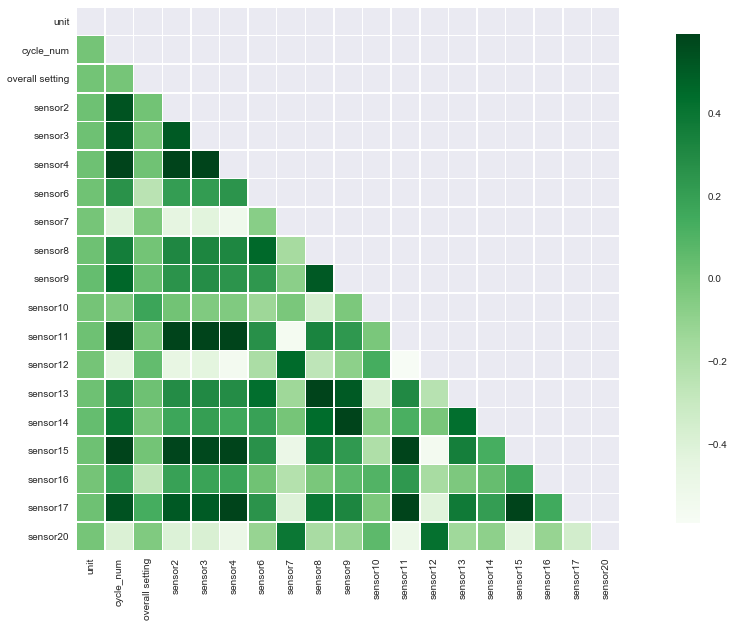

In [133]:
#Treino
corr = train_final_data.corr()
plot_corr_heatmap(corr)

# Definição do set de teste e do set target

In [155]:
##Treino
#Coluna targe do dataset
target_final_data_train = train_final_data['cycle_num']
#Colunas com os dados
train_final_data = train_final_data.drop(['cycle_num'], axis = 1)

In [135]:
##Teste
#Coluna targe do dataset
target_final_data_test = test_final_data['cycle_num']
#Colunas com os dados
test_final_data = test_final_data.drop(['cycle_num'], axis = 1)

In [136]:
##Teste Final
#Coluna targe do dataset
target_final_data_finaltest = finaltest_final_data['cycle_num']
#Colunas com os dados
finaltest_final_data = finaltest_final_data.drop(['cycle_num'], axis = 1)

# Modelos de regressão

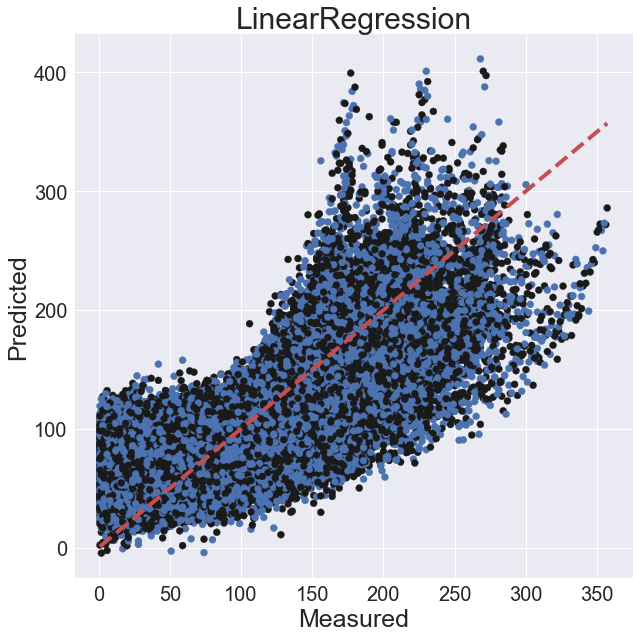

In [17]:
#ATENÇÃO------------->>>>>>>>>>> "Teste com o cross_val_predict para verificar os dados? Entender o que essa função realiza"
from xgboost import XGBRegressor as xgb
lr = linear_model.LinearRegression()
# lr = xgb(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
boston = train_final_data
y = target_final_data

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train_final_data, target_final_data, cv=100)

fig, ax = plt.subplots(figsize=(10,10))
plt.title(lr.__class__.__name__,fontsize=30)
ax.scatter(y, predicted, c=('b', 'k'))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
ax.set_xlabel('Measured',fontsize=25)
ax.set_ylabel('Predicted',fontsize=25)
ax.tick_params(labelsize=20)
plt.savefig(lr.__class__.__name__+'_Modelo.png', format='png', dpi=100)
plt.show()

In [160]:
#Funções para regressão dos dados:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
     
    clf.fit(X_train, y_train)
    print "O modelo foi treinado!"
    return 

def predict_labels_train(clf, X, y):
    ''' Faz uma estimativa utilizando um modelo de regressão ajustado em algum score ainda a ser definido. '''
       
    y_pred = clf.predict(X)
    
    # Imprime os resultados de retorno
    print ("Pronto!\n As previsões de treino para o modelo {} foram feitas!".format(clf.__class__.__name__))
    return  {"R2 score": r2_score(y.values, y_pred), 
             "Explained Variance Score": explained_variance_score(y.values, y_pred),
             "Mean Squared Error": mean_squared_error(y.values, y_pred)
            }

def predict_labels_test(clf, X, y):
    ''' Faz uma estimativa utilizando um modelo de regressão ajustado em algum score ainda a ser definido. '''
       
    y_pred = clf.predict(X)
#     y_pred_analise = pd.DataFrame(y_pred['cycle_num_pred'])
    
    
    
    
    # Imprime os resultados de retorno
    print ("Pronto!\n As previsões de teste para o modelo {} foram feitas!\n".format(clf.__class__.__name__))
    return  {"R2 score": r2_score(y.values, y_pred), 
             "Explained Variance Score": explained_variance_score(y.values, y_pred),
             "Mean Squared Error": mean_squared_error(y.values, y_pred),
             }

# def metrica(d,a1,a2)

#     for i, x in enumerate(d):
#         if (x < 0):
#             np.exp(-(d/a1))
#         else:
#             np.exp(d/a2)

In [161]:
# Neste passo irei realizar os modelos de regressão e mostrar os resultados

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from xgboost import XGBRegressor as xgb

Regression = [DecisionTreeRegressor(),SVR(C=1.0, epsilon=0.2) ,KNeighborsRegressor(n_neighbors=2,algorithm = 'auto'),linear_model.LinearRegression(),
              xgb(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7) 
             ]

resultados = { 
        'Modelo utilizado': [],
        'Conjunto de Treino': [], 
        'Conjunto de Teste': [],
        'Pontuação R2 (treinamento)': [], 
        'Pontuação R2 (teste)': [],
        'Explained Variance Score (treinamento)':[],
        'Explained Variance Score (teste)':[],
        'Mean Squared Error (treinamento)':[],
        'Mean Squared Error (teste)':[]
            }

################################DADOS PASSADOS NO MODELO###########################################################
# ##Treino
# #Coluna targe do dataset
# target_final_data_train = train_final_data['cycle_num']
# #Colunas com os dados
# train_final_data = train_final_data.drop(['cycle_num'], axis = 1)

##################################################################################################################

Dados_normalizados = [train_test_split(train_final_data, target_final_data_train, train_size=0.7 , random_state = 1)]

for clf in Regression:
    for split in Dados_normalizados:
        
        print ("Próximo modelo...\n")
        X_train, X_test, y_train, y_test = split
        
        time_train = train_classifier(clf, X_train, y_train)
        
        time_predict_train = predict_labels_train(clf, X_train, y_train)
        
        time_predict_test = predict_labels_test(clf, X_test, y_test)
        
        resultados['Modelo utilizado'].append(clf.__class__.__name__)
        resultados['Conjunto de Treino'].append(X_train.shape)
        resultados['Conjunto de Teste'].append(X_test.shape)
        resultados['Pontuação R2 (treinamento)'].append(time_predict_train["R2 score"])
        resultados['Pontuação R2 (teste)'].append(time_predict_test["R2 score"])
        resultados['Explained Variance Score (treinamento)'].append(time_predict_train["Explained Variance Score"])
        resultados['Explained Variance Score (teste)'].append(time_predict_test["Explained Variance Score"])
        resultados['Mean Squared Error (treinamento)'].append(time_predict_train["Mean Squared Error"])
        resultados['Mean Squared Error (teste)'].append(time_predict_test["Mean Squared Error"])
                
                
Results = pd.DataFrame(resultados)
Results = Results[['Modelo utilizado','Pontuação R2 (treinamento)','Explained Variance Score (treinamento)','Mean Squared Error (treinamento)',
                  'Pontuação R2 (teste)','Explained Variance Score (teste)','Mean Squared Error (teste)','Conjunto de Treino','Conjunto de Teste']]
Results.head()


Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo DecisionTreeRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo DecisionTreeRegressor foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo SVR foram feitas!
Pronto!
 As previsões de teste para o modelo SVR foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo KNeighborsRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo KNeighborsRegressor foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo LinearRegression foram feitas!
Pronto!
 As previsões de teste para o modelo LinearRegression foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo XGBRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo XGBRegressor foram feitas!



,Modelo utilizado,Pontuação R2 (treinamento),Explained Variance Score (treinamento),Mean Squared Error (treinamento),Pontuação R2 (teste),Explained Variance Score (teste),Mean Squared Error (teste),Conjunto de Treino,Conjunto de Teste
0,DecisionTreeRegressor,1.000000,1.000000,0.000000,0.337448,0.337510,3064.928571,"(32142, 18)","(13776, 18)"
1,SVR,0.189522,0.189783,3813.280849,0.181912,0.182134,3784.431508,"(32142, 18)","(13776, 18)"
2,KNeighborsRegressor,0.895557,0.895683,491.399563,0.674461,0.675731,1505.924887,"(32142, 18)","(13776, 18)"
3,LinearRegression,0.572367,0.572367,2012.000477,0.577046,0.577089,1956.563505,"(32142, 18)","(13776, 18)"
4,XGBRegressor,0.832980,0.832981,785.824251,0.766627,0.766653,1079.570766,"(32142, 18)","(13776, 18)"


# Modelo escolhido

# XGBOOST

Utilizando o XGboost para uma primeira rodada de previsão

In [162]:
# Neste passo irei realizar os modelos de regressão e mostrar os resultados

from xgboost import XGBRegressor as xgb

Regression = [xgb(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)]

resultados = { 
        'Modelo utilizado': [],
        'Conjunto de Treino': [], 
        'Conjunto de Teste': [],
        'Pontuação R2 (treinamento)': [], 
        'Pontuação R2 (teste)': [],
        'Explained Variance Score (treinamento)':[],
        'Explained Variance Score (teste)':[],
        'Mean Squared Error (treinamento)':[],
        'Mean Squared Error (teste)':[]
            }

################################DADOS PASSADOS NO MODELO###########################################################
# ##Treino
# #Coluna targe do dataset
# target_final_data_train = train_final_data['cycle_num']
# #Colunas com os dados
# train_final_data = train_final_data.drop(['cycle_num'], axis = 1)

##################################################################################################################

Dados_normalizados = [train_test_split(train_final_data, target_final_data_train, train_size=0.7 , random_state = 1)]

for clf in Regression:
    for split in Dados_normalizados:
        
        print ("Próximo modelo...\n")
        X_train, X_test, y_train, y_test = split
        
        time_train = train_classifier(clf, X_train, y_train)
        
        time_predict_train = predict_labels_train(clf, X_train, y_train)
        
        time_predict_test = predict_labels_test(clf, X_test, y_test)
        
        resultados['Modelo utilizado'].append(clf.__class__.__name__)
        resultados['Conjunto de Treino'].append(X_train.shape)
        resultados['Conjunto de Teste'].append(X_test.shape)
        resultados['Pontuação R2 (treinamento)'].append(time_predict_train["R2 score"])
        resultados['Pontuação R2 (teste)'].append(time_predict_test["R2 score"])
        resultados['Explained Variance Score (treinamento)'].append(time_predict_train["Explained Variance Score"])
        resultados['Explained Variance Score (teste)'].append(time_predict_test["Explained Variance Score"])
        resultados['Mean Squared Error (treinamento)'].append(time_predict_train["Mean Squared Error"])
        resultados['Mean Squared Error (teste)'].append(time_predict_test["Mean Squared Error"])

                  
Results_xgboost = pd.DataFrame(resultados)
Results_xgboost = Results_xgboost[['Modelo utilizado','Pontuação R2 (treinamento)','Explained Variance Score (treinamento)','Mean Squared Error (treinamento)',
                  'Pontuação R2 (teste)','Explained Variance Score (teste)','Mean Squared Error (teste)','Conjunto de Treino','Conjunto de Teste']]
Results_xgboost.head()


Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo XGBRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo XGBRegressor foram feitas!



,Modelo utilizado,Pontuação R2 (treinamento),Explained Variance Score (treinamento),Mean Squared Error (treinamento),Pontuação R2 (teste),Explained Variance Score (teste),Mean Squared Error (teste),Conjunto de Treino,Conjunto de Teste
0,XGBRegressor,0.83298,0.832981,785.824251,0.766627,0.766653,1079.570766,"(32142, 18)","(13776, 18)"


# Ajustando o modelo do Xgboost

In [173]:
def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
#     explainedvariancescore =  explained_variance_score(y_true, y_predict)
#     meansquarederror = mean_squared_error(y_true, y_predict)
          
    
    # Devolver a pontuação
    return score

In [174]:
def fit_model(X, y):

    from xgboost import XGBRegressor as xgb
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 1)
#     cv_sets = train_test_split(X, y, train_size=0.7 , random_state = 1)
    estimator = xgb()
   
    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    Params = {'n_estimators':[100,150,200], 
          'learning_rate':[0.05,0.07,0.4],
          'colsample_bytree':[0.5,0.7,1],
          'max_depth':[5,7,10]
         }

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    

    # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV( estimator=estimator, param_grid=Params, scoring=scoring_fnc, cv=cv_sets)
    #grid = GridSearchCV( estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets2)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)
   

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

print ('Tudo ok até então!')

Tudo ok até então!


In [176]:
reg = fit_model(train_final_data, target_final_data_train)

In [177]:
# Produzir valores para 'max_depth'
print "O parâmetro 'n_estimators' é {} para o modelo ótimo.".format(reg.get_params()['n_estimators'])
print "O parâmetro 'learning_rate' é {} para o modelo ótimo.".format(reg.get_params()['learning_rate'])
print "O parâmetro 'colsample_bytree' é {} para o modelo ótimo.".format(reg.get_params()['colsample_bytree'])
print "O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth'])

O parâmetro 'n_estimators' é 200 para o modelo ótimo.
O parâmetro 'learning_rate' é 0.4 para o modelo ótimo.
O parâmetro 'colsample_bytree' é 0.7 para o modelo ótimo.
O parâmetro 'max_depth' é 5 para o modelo ótimo.


# Modelo Final XGBOOST

In [179]:
#Dados Finais

X_train, X_test, y_train, y_test = train_test_split(train_final_data, target_final_data_train, train_size=0.7 , random_state = 1)

In [180]:
from xgboost import XGBRegressor as xgb

Regression = [xgb(n_estimators=200, learning_rate=0.4, gamma=0, subsample=0.75,colsample_bytree=0.7, max_depth=5)]

resultados = { 
        'Modelo utilizado': [],
        'Conjunto de Treino': [], 
        'Conjunto de Teste': [],
        'Pontuação R2 (treinamento)': [], 
        'Pontuação R2 (teste)': [],
        'Explained Variance Score (treinamento)':[],
        'Explained Variance Score (teste)':[],
        'Mean Squared Error (treinamento)':[],
        'Mean Squared Error (teste)':[]
            }

Dados_normalizados = [train_test_split(train_final_data, target_final_data_train, train_size=0.7 , random_state = 1)]

for clf in Regression:
    for split in Dados_normalizados:
        
        print ("Próximo modelo...\n")
        X_train, X_test, y_train, y_test = split
        
        time_train = train_classifier(clf, X_train, y_train)
        
        time_predict_train = predict_labels_train(clf, X_train, y_train)
        
        time_predict_test = predict_labels_test(clf, X_test, y_test)
        
        resultados['Modelo utilizado'].append(clf.__class__.__name__)
        resultados['Conjunto de Treino'].append(X_train.shape)
        resultados['Conjunto de Teste'].append(X_test.shape)
        resultados['Pontuação R2 (treinamento)'].append(time_predict_train["R2 score"])
        resultados['Pontuação R2 (teste)'].append(time_predict_test["R2 score"])
        resultados['Explained Variance Score (treinamento)'].append(time_predict_train["Explained Variance Score"])
        resultados['Explained Variance Score (teste)'].append(time_predict_test["Explained Variance Score"])
        resultados['Mean Squared Error (treinamento)'].append(time_predict_train["Mean Squared Error"])
        resultados['Mean Squared Error (teste)'].append(time_predict_test["Mean Squared Error"])

                  
Results_xgboost = pd.DataFrame(resultados)
Results_xgboost = Results_xgboost[['Modelo utilizado','Pontuação R2 (treinamento)','Explained Variance Score (treinamento)','Mean Squared Error (treinamento)',
                  'Pontuação R2 (teste)','Explained Variance Score (teste)','Mean Squared Error (teste)','Conjunto de Treino','Conjunto de Teste']]
Results_xgboost.head()

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo XGBRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo XGBRegressor foram feitas!



,Modelo utilizado,Pontuação R2 (treinamento),Explained Variance Score (treinamento),Mean Squared Error (treinamento),Pontuação R2 (teste),Explained Variance Score (teste),Mean Squared Error (teste),Conjunto de Treino,Conjunto de Teste
0,XGBRegressor,0.904748,0.904748,448.158999,0.810405,0.810416,877.053743,"(32142, 18)","(13776, 18)"


In [191]:
# Params = (n_estimators = 200, 
#          learning_rate = 0.4,
#          colsample_bytree = 0.7,
#          max_depth = 5)
         

estimator = xgb(n_estimators = 200,learning_rate = 0.4,colsample_bytree = 0.7,max_depth = 5)

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

X_text_df = pd.DataFrame(X_test)
y_pred_final = pd.DataFrame(y_pred, columns = ['y_pred'], index = X_text_df.index)

In [187]:
y_pred_final.shape

(13776, 1)

In [188]:
X_text_df.shape

(13776, 18)

In [192]:
X_text_df.head()

,unit,overall setting,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20
38929,185,1,0.510836,0.619269,0.285486,1.0,0.543662,0.276190,0.173858,0.0,0.400000,0.492593,0.279762,0.237667,0.465002,0.0,0.500000,0.223684
7359,35,1,0.359133,0.317896,0.473086,0.0,0.766197,0.247619,0.209830,0.0,0.446667,0.392593,0.258929,0.184961,0.525539,0.0,0.300000,0.407895
1607,8,3,0.259146,0.452178,0.209569,0.0,0.535627,0.339286,0.221120,0.0,0.355263,0.614493,0.327586,0.243961,0.346185,0.0,0.400000,0.701031
32915,156,4,0.428105,0.458142,0.596941,0.0,0.532164,0.214984,0.136119,0.0,0.157534,0.583333,0.210366,0.196389,0.206791,0.0,0.333333,0.500000
34640,165,2,0.578778,0.680204,0.679761,1.0,0.339789,0.636364,0.284511,0.0,0.875862,0.373068,0.733333,0.224325,0.763688,0.0,0.600000,0.301724


In [193]:
y_pred_final.head()

,y_pred
38929,94.388939
7359,77.113907
1607,159.405685
32915,108.951172
34640,160.981720


In [208]:
data_colunas = [y_pred_final,target_final_data_train,X_text_df]


engine_train = pd.concat(data_colunas, axis = 1, ignore_index=False,verify_integrity=True)

engine_train = engine_train.dropna(axis = 0, how = 'any')

engine_train.tail()

,y_pred,cycle_num,unit,overall setting,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20
45906,129.907166,122,218.0,1.0,0.622291,0.383291,0.649123,1.0,0.439437,0.079365,0.074495,0.0,0.653333,0.548148,0.065476,0.100185,0.757094,0.0,0.6,0.447368
45907,117.775574,123,218.0,1.0,0.702786,0.797999,0.766746,0.0,0.281690,0.069841,0.046068,0.0,0.693333,0.322222,0.077381,0.037352,0.648127,0.0,0.6,0.315789
45913,136.091949,129,218.0,1.0,0.848297,0.688155,0.837719,1.0,0.343662,0.047619,0.037035,0.0,0.773333,0.359259,0.056548,0.067462,0.799849,0.0,0.6,0.447368
45914,102.991974,130,218.0,1.0,0.554180,0.694671,0.733652,0.0,0.228169,0.034921,0.034325,0.0,0.733333,0.370370,0.023810,0.062997,0.779796,0.0,0.5,0.223684
45915,130.775040,131,218.0,1.0,0.507740,0.547126,0.891946,1.0,0.366197,0.019048,0.070032,0.0,0.873333,0.229630,0.038690,0.066699,0.858494,0.0,0.7,0.184211


In [219]:
d = []

for index, row in engine_train.iterrows():
     d.append(row.y_pred - row.cycle_num)
        
engine_train['d'] = d

engine_train['d'].head()

1      7.982021
6     75.979607
8     14.107479
11    48.174477
15    65.982513
Name: d, dtype: float64

In [239]:
def metrica(d):
    
    aux = 0
    for i in d:
        
        if (i < 0):
            aux = aux + (np.exp((-(i/13)))-1)           
        else:
            aux = aux + (np.exp(((i/10)))-1)
#         print aux
    return aux  

# Resultado Final

In [240]:
result = metrica(engine_train['d'])

print ('O resultado final para o set de treino foi de {} pontos.'.format(result))

O resultado final para o set de treino foi de 2593959.92731 pontos.


Analisando os dados, podemos fazer um check de qualidade de dados ao olharmos para a variância dos dados.

Sensores com baixa variância apresentam dados com distribuição mais próxima à normal.

In [ ]:
# def is_zero(series):
#     return series == 0

# #avaliando a variãncia dos dados agrupados por settings de cada sensor:
# variance_by_setting = train_data[sensor_names + ['overall_setting']].groupby('overall_setting').var()

# #Encontrando os sensores com variância zero
# sensor_variance = variance_by_setting.apply(is_zero, axis=0).all()

# display(variance_by_setting)

In [ ]:
# Generate a list of the sensors with zero variance.
sensor_drop_list=sensor_variance[sensor_variance].index.values

display(sensor_drop_list)
print ('\n')

# Drop these sensors from the training_data
train_data_subset = train_data.drop(sensor_drop_list, axis=1, inplace=False)

display(train_data_subset.head())

In [ ]:
sensor_names = get_sensor_names(train_data_subset)

train_data_subset[sensor_names].corr()

#Note below was determined visually
high_corr_cols = ['sensor3','sensor4','sensor6',
                  'sensor7','sensor12','sensor17',
                  'sensor20']
high_corr_cols

corr = train_data[sensor_names].corr()
corr[(corr > 0.99) & (corr < 1.0)]

# teste = corr[(corr > 0.95) & (corr < 1.0)]

In [ ]:
def plot_corr_heatmap(corr_matrix):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
# Compute the correlation matrix
corr = train_data_subset[sensor_names].corr()
plot_corr_heatmap(corr)

In [ ]:
train_data_subset = train_data_subset.drop(high_corr_cols, axis=1, inplace=False)

In [ ]:
sensor_names = get_sensor_names(train_data_subset)

corr = train_data_subset[sensor_names].corr()
plot_corr_heatmap(corr)